In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
    #for filename in filenames:
        #print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import patches
import seaborn as sns
import os
import random
import re
sns.set_style('darkgrid')
sns.set_palette('pastel')


# **Understanding the dataset**

*****PCB detection involving reference comparison approach *****

PCB (printed circuit boards) is used in electronic circuits and may contain different types of defects -

In reference approach method, we compare the PCB images with a standard template which can be used to find out the defects.



In [4]:
input_dir='/kaggle/input/pcb-defects/PCB_DATASET'
os.listdir(input_dir)

['rotate.py', 'PCB_USED', 'Annotations', 'images', 'rotation']

*  **PCB USED folder**- contains the 12 template images we used in the dataset.
* **images folder**- contains the PCB images subclassed into different types.
* **rotation folder**- contains the rotated PCB images subclassed into different types as well as rotation angle
* **annotations folder**- contains the annotations for bounding box of each images



 

**Analyzing the PCB USED folder**

In [5]:
template_dir=os.path.join(input_dir,'PCB_USED')
template_dir

'/kaggle/input/pcb-defects/PCB_DATASET/PCB_USED'

In [6]:
#Creating function to visualize images:
def visualize_img(dir_name,nos_):
    k=0
    plt.figure(figsize=(4,4))
    fig,ax=plt.subplots(1,2)
    for filename in os.listdir(dir_name)[0:nos_]:
        if filename.lower().endswith(('.jpg','.jpeg','.png')):
            
            img_path=os.path.join(dir_name,filename)
            img=plt.imread(img_path)
            ax[k].imshow(img)
            ax[k].set_xlabel(filename)
            ax[k].grid(False)
            ax[k].set_xticks([])
            ax[k].set_yticks([])
            k+=1
    plt.show()

<Figure size 400x400 with 0 Axes>

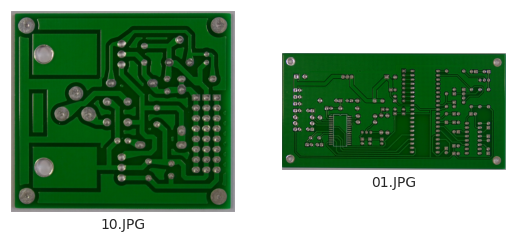

No of template images:10


In [7]:
visualize_img(template_dir,nos_=2)

print(f'No of template images:{len(os.listdir(template_dir))}')

**Analyzing the images folder**

In [8]:
os.listdir(os.path.join(input_dir,'images'))
types_defect=os.listdir(os.path.join(input_dir,'images'))
types_defect

['Mouse_bite',
 'Spur',
 'Open_circuit',
 'Short',
 'Missing_hole',
 'Spurious_copper']

In [9]:
img_dir=os.path.join(input_dir,'images')


In [10]:
#Creating an image path list for ready refernce
img_path_list=[]
#Creating img_path list
for sub_cat in types_defect:
    for file in os.listdir(os.path.join(img_dir,sub_cat)):
    
        img_path_list.append(os.path.join(img_dir,sub_cat,file))
        

In [11]:
#Sorting the list 
img_path_list=sorted(img_path_list)


In [ ]:
#Vizualizing defect images
df_defect=pd.DataFrame(columns=['No of defect']) #dataframe for counting no of defects
for sub_cat in types_defect:
    visualize_img(os.path.join(img_dir,sub_cat),nos_=2)

    print(f'No of {sub_cat} images:{len(os.listdir(os.path.join(img_dir,sub_cat)))}')
    
    df_defect.loc[sub_cat]=len(os.listdir(os.path.join(img_dir,sub_cat)))
    

In [ ]:
#No. of defects by type
df_defect

**Analyzing rotated folder**

In [12]:
rotated_dir=os.path.join(input_dir,'rotation')
os.listdir(rotated_dir)

['Missing_hole_rotation',
 'Spur_rotation',
 'Mouse_bite_angles.txt',
 'Missing_hole_angles.txt',
 'Open_circuit_rotation',
 'Spurious_copper_angles.txt',
 'Spur_angles.txt',
 'Short_angles.txt',
 'Short_rotation',
 'Spurious_copper_rotation',
 'Open_circuit_angles.txt',
 'Mouse_bite_rotation']

In [13]:
rotated_angle_list=[j for j in os.listdir(rotated_dir) if j.endswith('.txt')]
rotated_angle_list

['Mouse_bite_angles.txt',
 'Missing_hole_angles.txt',
 'Spurious_copper_angles.txt',
 'Spur_angles.txt',
 'Short_angles.txt',
 'Open_circuit_angles.txt']

In [ ]:
types_defect_rotated=[j for j in os.listdir(rotated_dir) if j.endswith('.txt')==False]
types_defect_rotated

In [ ]:
#Vizualizing rotated defects
df_defect_rotated=pd.DataFrame(columns=['No of defect'])
for sub_cat in types_defect_rotated:
    visualize_img(os.path.join(rotated_dir,sub_cat),nos_=2)

    print(f'No of {sub_cat} images:{len(os.listdir(os.path.join(rotated_dir,sub_cat)))}')
    
    df_defect_rotated.loc[sub_cat]=len(os.listdir(os.path.join(rotated_dir,sub_cat)))

In [ ]:
#No. of defects by type  rotated 
df_defect_rotated

In [ ]:
#Reading the rotation text files

df_rotation_angle=pd.DataFrame(columns=['Line','Angle'])
for filename in rotated_angle_list:
    with open(os.path.join(rotated_dir,filename),'r') as f:
        lines=f.readlines()
        for line in lines:
            text,angle=line.split()        
            df_rotation_angle=pd.concat([df_rotation_angle,pd.DataFrame({'Line':[text],'Angle':[angle]})],axis=0)
        

In [ ]:
df_rotation_angle

**Analyzing the annotate folder**

In [14]:
annote_dir=os.path.join(input_dir,'Annotations')
annote_dir

'/kaggle/input/pcb-defects/PCB_DATASET/Annotations'

In [15]:
type_annot=os.listdir(annote_dir)
type_annot

['Mouse_bite',
 'Spur',
 'Open_circuit',
 'Short',
 'Missing_hole',
 'Spurious_copper']

In [16]:
#Checking the type of files
file_list=os.listdir(os.path.join(annote_dir,'Mouse_bite'))
file_list[0:5]

['01_mouse_bite_11.xml',
 '01_mouse_bite_17.xml',
 '08_mouse_bite_08.xml',
 '08_mouse_bite_02.xml',
 '07_mouse_bite_03.xml']

We see that all files are in XML format, so we have to parse the data

In [17]:
#importing xml ET to parse xml file
import xml.etree.ElementTree as ET



In [ ]:
tree = ET.parse(os.path.join(os.path.join(annote_dir,'Mouse_bite'),'01_mouse_bite_11.xml'))
root = tree.getroot()

In [ ]:
#getting the structure of XML file
print(ET.tostring(root, encoding='utf8').decode('utf8'))

In [ ]:
#Parsing XML to return Bounding box dimensions 
def parse_xml(xml_file):
    
    data=[]
    
    tree = ET.parse(xml_file)
    root = tree.getroot()
    
    filename = root.find('filename').text
    width = int(root.find('size/width').text)
    height = int(root.find('size/height').text)
    for obj in root.findall('object'):
        name = obj.find('name').text
        xmin = int(obj.find('bndbox/xmin').text)
        ymin = int(obj.find('bndbox/ymin').text)
        xmax = int(obj.find('bndbox/xmax').text)
        ymax = int(obj.find('bndbox/ymax').text)
        
        data.append({
            'filename': filename,
            'width': width,
            'height': height,
            'class': name,
            'xmin': xmin,
            'ymin': ymin,
            'xmax': xmax,
            'ymax': ymax
        })
        
    return data

In [ ]:
#Retrieving data for all files
data=[]
all_data=[]

for x in type_annot:
    for file in os.listdir(os.path.join(annote_dir,x)):
        xml_file_path=os.path.join(os.path.join(annote_dir,x),file)
        data=parse_xml(xml_file_path)
        all_data.extend(data)
        

In [ ]:
#Creating a dataframe to store the annotations
df_annot=pd.DataFrame(all_data)
df_annot

In [ ]:
#Visualizing the no of defects in each pcb
df_multiple_defects=pd.DataFrame(df_annot['filename'].value_counts())
sns.countplot(df_multiple_defects,x='count')
plt.xlabel('No of defects in one PCB')

There are 1-6 no. of defects in same PCB, with most cases bein 3 or 5

In [ ]:
import matplotlib.patches as patches

In [ ]:
#Defin|g a function to view image along with bounding box

def draw_bounding_boxes(image_path, bounding_boxes,annotation):
    """
    Draws multiple bounding boxes on an image using Matplotlib.

    Args:
        image_path: The path to the image file.
        bounding_boxes: A list of bounding boxes, each represented as a tuple or list containing
                       (min_x, min_y, max_x, max_y).
    """
    
    # Load the image
    img = plt.imread(image_path)

    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(15,10))

    # Display the image
    ax.imshow(img)

    # Draw each bounding box
    for bbox in bounding_boxes:
        min_x, min_y, max_x, max_y = bbox
        width = max_x - min_x
        height = max_y - min_y
        rect = patches.Rectangle((min_x, min_y), width, height, linewidth=1, edgecolor='red', facecolor='none')
        ax.add_patch(rect)
        
        # Calculate the centroid of the bounding box
        centroid_x = (min_x + max_x) / 2
        centroid_y = (min_y + max_y) / 2

        # Add the annotation to the centroid
        ax.annotate( annotation,(centroid_x,centroid_y),(max_x+20,max_y+20),
            fontsize=10,color='white',
            horizontalalignment='right', verticalalignment='top')
        
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
   
    

    # Show the plot
    plt.show()

In [ ]:
import re

In [ ]:
#Getting filename from filepath
filepath=img_path_list[0]
filename=re.sub(r'.+/([\w_]+\.jpg)',r'\1',filepath)
filename

In [ ]:
img_path_list[0]

In [ ]:
#Defining function to select the a file and return image along with bounding box
def visualize_annotations(list_image_path,df):
    for i in list_image_path:
        filepath=i
        filename=re.sub(r'.+/([\w_]+\.jpg)',r'\1',filepath)
        df_selected=df[df['filename']==filename]
        width=df_selected['width'].values
        height=df_selected['height'].values
        class_name=df_selected['class'].values
        xmin=df_selected['xmin'].values
        ymin=df_selected['ymin'].values
        xmax=df_selected['xmax'].values
        ymax=df_selected['ymax'].values

        bbox=zip(xmin,ymin,xmax,ymax)
        draw_bounding_boxes(filepath, bbox,class_name[0])

In [ ]:
image_path_shuffle=img_path_list
random.shuffle(image_path_shuffle)

visualize_annotations(image_path_shuffle[0:5],df_annot)

# **Preparing data for inputting to YOLO**

In [ ]:
df_annot

We need to create a directory structure with images and annotation as subfolder

In [18]:
root_dir=os.getcwd()

In [ ]:
#Creating the dataset directory along with images and labels sub-directory
os.makedirs(os.path.join(root_dir,'dataset'),exist_ok=True)
dataset_dir=os.path.join(root_dir,'dataset')

images_dir = os.path.join(dataset_dir, 'images')  #images directory
labels_dir = os.path.join(dataset_dir, 'labels')  #annotations directory
os.makedirs(images_dir,exist_ok=True)
os.makedirs(labels_dir,exist_ok=True)

In [ ]:
os.listdir(dataset_dir)

In [ ]:
#Checking the no of files
len(img_path_list)

In [ ]:
#Now splitting our images path list for train,val and test
random.seed(42)
random.shuffle(img_path_list)

train_test_split=0.95
train_val_split=0.8

total_train_len=int(len(img_path_list)*train_test_split)
train_len=int(total_train_len*train_val_split)
val_len=total_train_len-train_len
test_len=len(img_path_list)-train_len-val_len

print(f'Train length:{train_len},Validation length:{val_len},Test length:{test_len}')

In [ ]:
import shutil

In [ ]:
#Defining a function to copy images from original to target directory
def copy_images_to_dir(original_dir,target_dir,train_len,val_len):
    
    if os.path.exists(os.path.join(target_dir,'train')): #Removing all sub-directories ,if exists, to remove duplication
        shutil.rmtree(os.path.join(target_dir,'train'))  
        shutil.rmtree(os.path.join(target_dir,'val'))
        shutil.rmtree(os.path.join(target_dir,'test'))
                 

    #Making new dircetories within target_dir
    os.makedirs(os.path.join(target_dir,'train'),exist_ok=True)
    os.makedirs(os.path.join(target_dir,'val'),exist_ok=True)
    os.makedirs(os.path.join(target_dir,'test'),exist_ok=True)

    #Copying files
    for filepath in img_path_list[:train_len]:
        filename=re.sub(r'.+/([\w_]+\.jpg)',r'\1',filepath)
        shutil.copy(filepath, os.path.join(images_dir,'train',filename))

    for filepath in img_path_list[train_len:train_len+val_len]:
        filename=re.sub(r'.+/([\w_]+\.jpg)',r'\1',filepath)
        shutil.copy(filepath, os.path.join(images_dir,'val',filename))

    for filepath in img_path_list[train_len+val_len:]:
        filename=re.sub(r'.+/([\w_]+\.jpg)',r'\1',filepath)
        shutil.copy(filepath, os.path.join(images_dir,'test',filename))

In [ ]:
copy_images_to_dir(original_dir=input_dir,target_dir=images_dir,train_len=train_len,val_len=val_len)
#Checking the length of files in images dir
print(f"Length of train set:{len(os.listdir(os.path.join(images_dir,'train')))}")
print(f"Length of val set:{len(os.listdir(os.path.join(images_dir,'val')))}")
print(f"Length of test set:{len(os.listdir(os.path.join(images_dir,'test')))}")

In [ ]:
for set in ['train','val','test']:
    for filename in os.listdir(os.path.join(images_dir,set)):
        for i in df_annot[df_annot['filename']==filename].index:
              df_annot.loc[i,'set']=set
df_annot

YOLO format should be (class x_center y_center width height)

Class numbers should be zero-indexed (start with 0)

Box coordinates must be in normalized xywh format (from 0 to 1)

In [ ]:
#Defining box dimensions inxywh format

df_annot['box_width']=(df_annot['xmax']-df_annot['xmin'])/df_annot['width']
df_annot['box_height']=(df_annot['ymax']-df_annot['ymin'])/df_annot['height']
df_annot['x_center']=(df_annot['xmin']+df_annot['box_width']//2)/df_annot['width']
df_annot['y_center']=(df_annot['ymin']+df_annot['box_height']//2)/df_annot['height']
df_annot

In [ ]:
class_dict=dict(enumerate(df_annot['class'].unique()))
#Preparing the text files
class_dict

In [ ]:
reverse_dict={v: k for k, v in class_dict.items()}
df_annot['class_label']=df_annot['class'].map(reverse_dict)
df_annot

In [ ]:
#Defining a funation to create labels dir from dataframe

def create_labels_from_df(label_dir,images_dir,df):
    if os.path.exists(os.path.join(label_dir,'train')):
        shutil.rmtree(os.path.join(label_dir,'train'))  #Removing all sub-directories ,if exists, to remove duplication
        shutil.rmtree(os.path.join(label_dir,'val'))
        shutil.rmtree(os.path.join(label_dir,'test'))
                 

    #Making new dircetories within label_dir
    os.makedirs(os.path.join(label_dir,'train'),exist_ok=True)
    os.makedirs(os.path.join(label_dir,'val'),exist_ok=True)
    os.makedirs(os.path.join(label_dir,'test'),exist_ok=True)


    #Creating label .txt file in YOLO format
    for i in ['train','test','val']:
        for file_path in os.listdir(os.path.join(images_dir,i)):
            df_temp=df[df['filename']==file_path]
            txt_file_name=".".join([file_path.split('.')[0],'txt'])
            if os.path.exists(os.path.join(label_dir,i,txt_file_name)):
                continue
            else:
                for index, row in df_temp.iterrows():
                    with open(os.path.join(label_dir,i,txt_file_name),'a') as file:
                        file.write(f"{row['class_label']} {row['x_center']} {row['y_center']} {row['box_width']} {row['box_height']}\n" )


                 

In [ ]:
create_labels_from_df(labels_dir,images_dir,df=df_annot)
#Checking the length of files in annotation dir
print(f"Length of train set:{len(os.listdir(os.path.join(labels_dir,'train')))}")
print(f"Length of val set:{len(os.listdir(os.path.join(labels_dir,'val')))}")
print(f"Length of test set:{len(os.listdir(os.path.join(labels_dir,'test')))}")

# **Preparing Model**

In [8]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 882.7/882.7 kB 13.9 MB/s eta 0:00:00a 0:00:01


In [9]:
#Creating YAML format
data_yaml={
    'path':str(os.path.join(root_dir,'dataset')),
    'train':'images/train',
    'val':'images/val',
    'test':'images/test',
    'nc': len(class_dict),
    'names': list(class_dict.values())
}
data_yaml

NameError: name 'root_dir' is not defined

In [ ]:
#Creating yaml file
import yaml

#Writing to yaml file
with open('data.yaml', 'w') as f:
    yaml.dump(data_yaml, f, default_flow_style=False)

In [10]:
#Training YOLO model
from ultralytics import YOLO
import ultralytics as ultralytics

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [8]:
#Loading model
model=YOLO('yolo11s.pt')

In [ ]:
#Disabling weights & biases metrics
os.environ['WANDB_MODE'] = 'disabled'

In [ ]:
#Training the model
results=model.train(data=os.path.join(root_dir,'data.yaml'),epochs=300)

**Understanding the metrics**

**Class**: This denotes the name of the object class, such as "person", "car", or "dog".

**Images**: This metric tells you the number of images in the validation set that contain the object class.

**Instances**: This provides the count of how many times the class appears across all images in the validation set.

**Box(P, R, mAP50, mAP50-95)**: This metric provides insights into the model's performance in detecting objects:

**P (Precision)**: The accuracy of the detected objects, indicating how many detections were correct.

**R (Recall)**: The ability of the model to identify all instances of objects in the images.

**mAP50**: Mean average precision calculated at an intersection over union (IoU) threshold of 0.50. It's a measure of the model's accuracy considering only the "easy" detections.

**mAP50-95**: The average of the mean average precision calculated at varying IoU thresholds, ranging from 0.50 to 0.95. It gives a comprehensive view of the model's performance across different levels of detection difficulty.

**Other Important concepts:**

**Intersection over Union (IoU)**: IoU is a measure that quantifies the overlap between a predicted bounding box and a ground truth bounding box. It plays a fundamental role in evaluating the accuracy of object localization.

**Average Precision (AP)**: AP computes the area under the precision-recall curve, providing a single value that encapsulates the model's precision and recall performance.

**Mean Average Precision (mAP)**: mAP extends the concept of AP by calculating the average AP values across multiple object classes. This is useful in multi-class object detection scenarios to provide a comprehensive evaluation of the model's performance.

**Loss Function**

“box” refers to the loss associated with bounding box regression,

“dfl” stands for Distribution Focal Loss, 

“cls” is the standard classification Cross Entropy Loss, i.e. the class loss weight

# **Evaluating Metrics**

In [11]:
result_dir='runs/detect/train21'

In [ ]:
#Listing the result
os.listdir(result_dir)

In [ ]:
df_result=pd.read_csv(os.path.join(result_dir,'results.csv'))
df_result

In [ ]:
#Plotting the losses
plt.figure(figsize=(15,5))
k=1
for i in ['box_loss','cls_loss','dfl_loss']:
    ax=plt.subplot(1,3,k)
    sns.lineplot(df_result,x='epoch',y='train/'+i,label='train',ax=ax)
    sns.lineplot(df_result,x='epoch',y='val/'+i,label='val',ax=ax)
    ax.set_xlabel(i)
    k+=1


In [ ]:
#Plotting the metrics
plt.figure(figsize=(10,5))
k=1
for i in ['metrics/precision(B)','metrics/recall(B)','metrics/mAP50(B)','metrics/mAP50-95(B)']:
    ax=plt.subplot(2,2,k)
    sns.lineplot(df_result,x='epoch',y=i,ax=ax)
    ax.set_xlabel(i)
    k+=1
plt.tight_layout()

In [ ]:
#Creating function to visualize result:
def visualize_result(dir_name,list_images):
    k=1
    plt.figure(figsize=(20,15))
    for filename in list_images:
            ax=plt.subplot((len(list_images)//2+1),2,k)
            img_path=os.path.join(dir_name,filename)
            img=plt.imread(img_path)
            ax.imshow(img)
            ax.set_xlabel(filename)
            ax.grid(False)
            ax.set_xticks([])
            ax.set_yticks([])
            k+=1
    plt.tight_layout()        
    plt.show()
    

In [ ]:
#Visualizing confusion matrix
list_confusion=['confusion_matrix.png','confusion_matrix_normalized.png']
visualize_result(result_dir,list_confusion)

In [ ]:
#Visualizing metrics
list_curve=['P_curve.png','R_curve.png','PR_curve.png']
visualize_result(result_dir,list_curve)

**Mean Average Precision on validation set at 0.5 threshold=0.945**

# **Evaluating on Test Data**

In [12]:
#Now let's load our best model to evaluate on test data
os.listdir(os.path.join(result_dir,'weights'))
best_model_path=os.path.join(result_dir,'weights','best.pt')
best_model=YOLO(best_model_path)

In [ ]:
#Predicting on test data
test_image_dir=os.path.join(images_dir,'test')
result_test=best_model.predict(test_image_dir,save=True, save_txt=True, save_conf=True)

In [ ]:
#Defining the test directory predictions
test_dir=os.path.join(root_dir,'runs/detect/predict6/labels')

In [ ]:
#Defining a function to extract annotations from predictions

def data_from_predicted_labels(test_dir):
    df=pd.DataFrame(columns=['filename','class_label','x_center','y_center','box_width','box_height','confidence'])
    
    for i in os.listdir(test_dir):
        with open(os.path.join(test_dir,i),'r') as f:
            for line in f.readlines():
                dict_temp={
                'class_label':line.split()[0],
                'x_center':line.split()[1],
                'y_center':line.split()[2],
                'box_width':line.split()[3],
                'box_height':line.split()[4],
                'confidence':line.split()[5],
                'filename':re.sub(r'.txt','.jpg',i)   #Replacing .txt extension with .jpg
                }

                df.loc[len(df),:]=dict_temp
    df['class_label']=df['class_label'].astype('int')
    df['filename']=df['filename'].astype('str')
    
    df[['x_center','y_center','box_width','box_height','confidence']]=df[['x_center','y_center','box_width','box_height','confidence']].astype('float')

    return df          

In [ ]:
df_extract=data_from_predicted_labels(test_dir)
df_extract

In [ ]:
#Function to calculate box dimensions
def box_dim_df(df_test,df_annot):
    #Getting the original height & width dimensions
    df_merged=pd.merge(df_test,df_annot[['filename','width','height']],on=['filename'],how='left')
    df_merged=df_merged.drop_duplicates(keep='first')
    
    #Multiplying with original height & width to convert to exact dimensions
    df_merged['xmin']=(df_merged['x_center']-df_merged['box_width']/2)*df_merged['width']
    df_merged['xmax']=(df_merged['x_center']+df_merged['box_width']/2)*df_merged['width']
    df_merged['ymin']=(df_merged['y_center']-df_merged['box_height']/2)*df_merged['height']
    df_merged['ymax']=(df_merged['y_center']+df_merged['box_height']/2)*df_merged['height']
    df_merged['class']=df_merged['class_label'].map(class_dict)
    
    return df_merged

In [ ]:
df_test=box_dim_df(df_extract,df_annot)
df_test

In [ ]:
#Defing a function to view image along with bounding box

def draw_bounding_boxes_predict(image_path, bounding_boxes_actual,bounding_boxes_predict,annotation_actual,annotation_predict):
    """
    Draws multiple bounding boxes on an image using Matplotlib.

    Args:
        image_path: The path to the image file.
        bounding_boxes: A list of bounding boxes, each represented as a tuple or list containing
                       (min_x, min_y, max_x, max_y).
    """
    
    # Load the image
    img = plt.imread(image_path)

    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(10,10))

    # Display the image
    ax.imshow(img)

    # Draw each bounding box for actual
    for bbox in bounding_boxes_actual:
        min_x, min_y, max_x, max_y = bbox
        width = max_x - min_x
        height = max_y - min_y
        rect = patches.Rectangle((min_x, min_y), width, height, linewidth=1, edgecolor='red', facecolor='none')
        ax.add_patch(rect)
        
        # Calculate the centroid of the bounding box
        centroid_x = (min_x + max_x) / 2
        centroid_y = (min_y + max_y) / 2

        # Add the annotation to the centroid
        ax.annotate( annotation_actual,(centroid_x,centroid_y),(max_x+20,max_y+20),
            fontsize=10,color='white',
            horizontalalignment='right', verticalalignment='top')
        
     # Draw each bounding box for predicted
    for bbox in bounding_boxes_predict:
        min_x, min_y, max_x, max_y = bbox
        width = max_x - min_x
        height = max_y - min_y
        rect = patches.Rectangle((min_x, min_y), width, height, linewidth=1, edgecolor='yellow', facecolor='none')
        ax.add_patch(rect)
        
        # Calculate the centroid of the bounding box
        centroid_x = (min_x + max_x) / 2
        centroid_y = (min_y + max_y) / 2

        # Add the annotation to the centroid
        ax.annotate( annotation_predict,(centroid_x,centroid_y),(min_x-20,min_y-20),
            fontsize=10,color='white',
            horizontalalignment='right', verticalalignment='top')
        
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    imagename=re.sub(r'.+/([\w_]+\.jpg)',r'\1',image_path)
    plt.xlabel(imagename)

    # Show the plot
    plt.show()

In [ ]:
#Defining function to select the a file and return image along with bounding box original vs predicted
def visualize_annotations_predict(list_image_path,df_orig,df_pred):
    for i in list_image_path:
        filepath=i
        filename=re.sub(r'.+/([\w_]+\.jpg)',r'\1',filepath)
        df_selected=df_orig[df_orig['filename']==filename]
        class_name_act=df_selected['class'].values
        xmin=df_selected['xmin'].values
        ymin=df_selected['ymin'].values
        xmax=df_selected['xmax'].values
        ymax=df_selected['ymax'].values

        bbox_actual=zip(xmin,ymin,xmax,ymax)
        
        
        df_selected=df_pred[df_pred['filename']==filename]
        class_name_pred=df_selected['class'].values
        xmin=df_selected['xmin'].values
        ymin=df_selected['ymin'].values
        xmax=df_selected['xmax'].values
        ymax=df_selected['ymax'].values
        
        bbox_predict=zip(xmin,ymin,xmax,ymax)
        
        draw_bounding_boxes_predict(filepath,bbox_actual,bbox_predict,'actual_'+class_name_act[0],'predicted_'+class_name_pred[0])
        

In [ ]:
test_image_list=[]
for i in os.listdir(os.path.join(images_dir,'test')):
    test_image_list.append(os.path.join(images_dir,'test',i))

In [ ]:
#Visualizing some images for bounding box comparision
visualize_annotations_predict(test_image_list[0:10:2],df_orig=df_annot,df_pred=df_test)

From the above images, we can observe that the bounding box predictions are correct but the positioning of bounding boxes seems to be shifted.
We can improve upon this model 

In [ ]:
def move_to_dummy(original_dir,dummy_dir):
    shutil.rmtree(dummy_dir) #Remove if exists
    os.makedirs(dummy_dir)
    
    images_dum_val_dir=os.path.join(dummy_dir,'images','val')
    labels_dum_val_dir=os.path.join(dummy_dir,'labels','val')
    images_dum_train_dir=os.path.join(dummy_dir,'images','train')
    labels_dum_train_dir=os.path.join(dummy_dir,'labels','train')
                  
    os.makedirs(images_dum_val_dir)
    os.makedirs(labels_dum_val_dir)
    os.makedirs(images_dum_train_dir)
    os.makedirs(labels_dum_train_dir)
    
    images_test_dir=os.path.join(original_dir,'images','test')
    labels_test_dir=os.path.join(original_dir,'labels','test')
    images_train_dir=os.path.join(original_dir,'images','train')
    labels_train_dir=os.path.join(original_dir,'labels','train')
    
    for i in os.listdir(images_test_dir):
        shutil.copy(os.path.join(images_test_dir,i),os.path.join(images_dum_val_dir,i))
    for i in os.listdir(labels_test_dir):
        shutil.copy(os.path.join(labels_test_dir,i),os.path.join(labels_dum_val_dir,i))
    for i in os.listdir(images_train_dir):
        shutil.copy(os.path.join(images_train_dir,i),os.path.join(images_dum_train_dir,i))
    for i in os.listdir(labels_train_dir):
        shutil.copy(os.path.join(labels_train_dir,i),os.path.join(labels_dum_train_dir,i))

In [ ]:
original_dir=os.path.join(root_dir,'dataset')
dummy_dir=os.path.join(root_dir,'dummy_dataset')

move_to_dummy(original_dir,dummy_dir)

print(f"Length of image files:{len(os.listdir(os.path.join(dummy_dir,'images','val')))}")
print(f"Length of label files:{len(os.listdir(os.path.join(dummy_dir,'labels','val')))}")

Creating yaml file

In [ ]:
#Creating YAML format
data_test_yaml={
    'path':str(os.path.join(root_dir,'dummy_dataset')),
    'train':'images/train',
    'val':'images/val',
    'nc': len(class_dict),
    'names': list(class_dict.values())
}
data_test_yaml

In [ ]:
#Creating yaml file
import yaml

#Writing to yaml file
with open('data_test.yaml', 'w') as f:
    yaml.dump(data_test_yaml, f, default_flow_style=False)

In [ ]:
result_val=best_model.val(data=os.path.join(root_dir,'data_test.yaml'))

In [ ]:
result_val_dir='runs/detect/val2'

In [ ]:
#Visualizing confusion matrix
list_confusion=['confusion_matrix.png','confusion_matrix_normalized.png']
visualize_result(result_val_dir,list_confusion)

In [ ]:
#Visualizing metrics
list_curve=['P_curve.png','R_curve.png','PR_curve.png']
visualize_result(result_val_dir,list_curve)

# **Creating a function to predict return annoted image**

In [18]:
#Defing a function to view image along with bounding box

def draw_bounding_boxes_image(image_path, bounding_boxes,annotation):
    """
    Draws multiple bounding boxes on an image using Matplotlib.

    Args:
        image_path: The path to the image file.
        bounding_boxes: A list of bounding boxes, each represented as a tuple or list containing
                       (min_x, min_y, max_x, max_y).
    """
    
    # Load the image
    img = plt.imread(image_path)

    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(10,10))

    # Display the image
    ax.imshow(img)

    # Draw each bounding box for actual
    for bbox in bounding_boxes:
        min_x, min_y, max_x, max_y = bbox
        width = max_x - min_x
        height = max_y - min_y
        rect = patches.Rectangle((min_x+35, min_y+35), width, height, linewidth=1, edgecolor='red', facecolor='none')
        ax.add_patch(rect)
        
        # Calculate the centroid of the bounding box
        centroid_x = (min_x + max_x) / 2
        centroid_y = (min_y + max_y) / 2

        # Add the annotation to the centroid
        ax.annotate( annotation,(centroid_x,centroid_y),(max_x+20,max_y+20),
            fontsize=10,color='white',
            horizontalalignment='right', verticalalignment='top')
        
        
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    imagename=re.sub(r'.+/([\w_]+\.jpg)',r'\1',image_path)
    plt.xlabel(imagename)

    # Show the plot
    plt.show()

In [6]:
#Defining the function to predict and return annoted image
def model_predict(model,image_path):

    result_test=model.predict(image_path)
    for r in result_test:
        bounding_boxes=r.boxes.xyxy.cpu().numpy()  #Numpy array of bounding box
        class_dict=r.names                         #Class dict
        pred_class=r.boxes.cls.cpu().numpy()[0].astype('int') #Predicted classes
        
    annotation=class_dict[pred_class]
    
    draw_bounding_boxes_image(image_path, bounding_boxes,annotation)
    

    


image 1/1 /kaggle/working/dataset/images/test/07_mouse_bite_10.jpg: 448x640 5 mouse_bites, 236.8ms
Speed: 3.1ms preprocess, 236.8ms inference, 1.0ms postprocess per image at shape (1, 3, 448, 640)


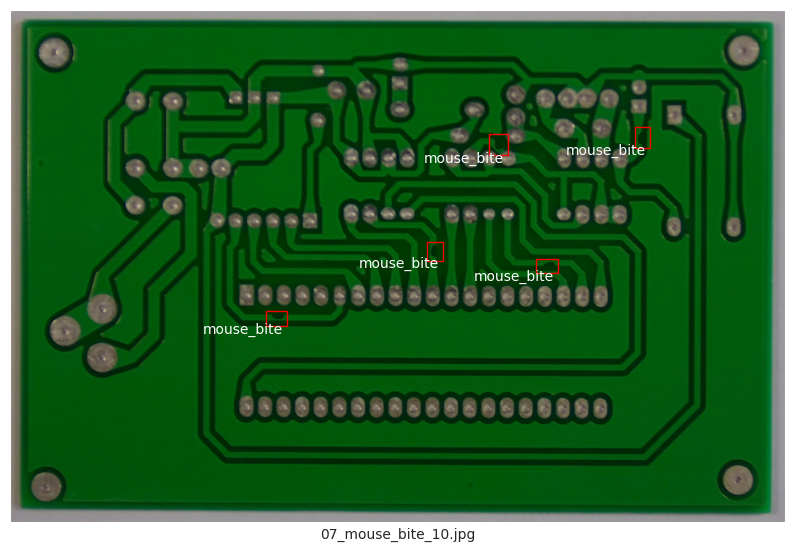

In [19]:
#Testing
image_path='/kaggle/working/dataset/images/test/07_mouse_bite_10.jpg'
model_predict(model=best_model,image_path=image_path)

In [40]:
import joblib

In [13]:
#saving model as pkl file
with open('yolo_model.pkl','wb') as f:
    joblib.dump(best_model,f)

In [41]:
with open('yolo_model.pkl','rb') as f:
    bmodel=joblib.load(f)


image 1/1 /kaggle/working/dataset/images/test/07_mouse_bite_10.jpg: 448x640 5 mouse_bites, 9.8ms
Speed: 2.4ms preprocess, 9.8ms inference, 1.3ms postprocess per image at shape (1, 3, 448, 640)


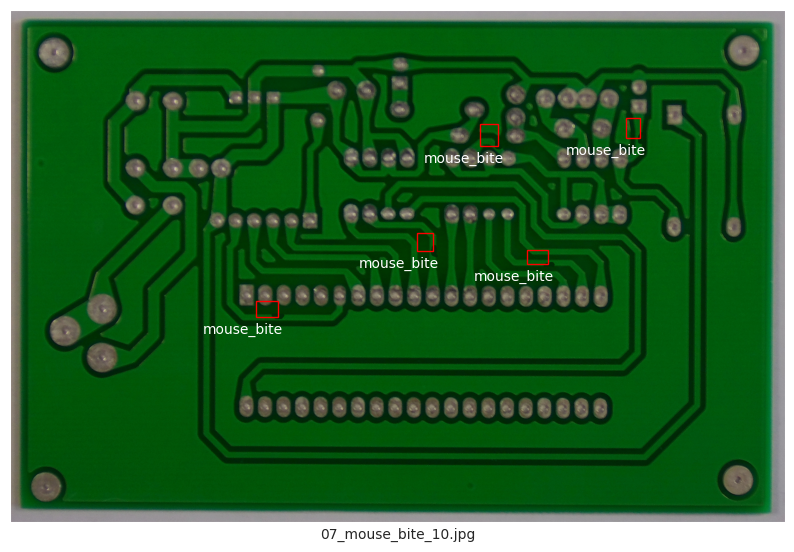

In [42]:
model_predict(model=bmodel,image_path=image_path)